# BitPredit

In [1]:
# Get data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-10 08:56:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-07-10 08:56:46 (12.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
# Importing the time series data
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates =["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
len(df)

2787

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


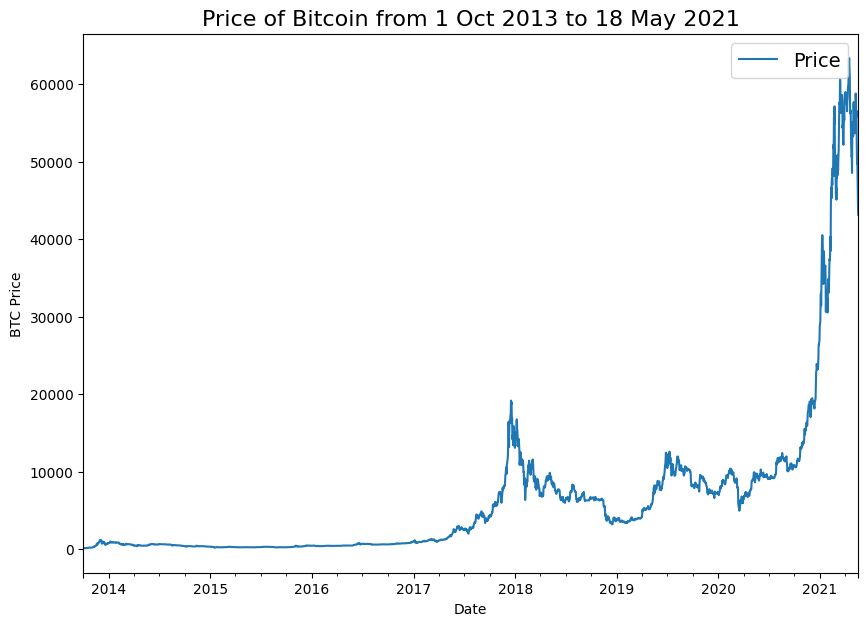

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

# Importing the data with CSV Module

In [7]:
import csv
from datetime import datetime

timesteps =[]
btc_prices =[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter =",")
  next(csv_reader) #skips the first line(header)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_prices.append(float(line[2]))

# View
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

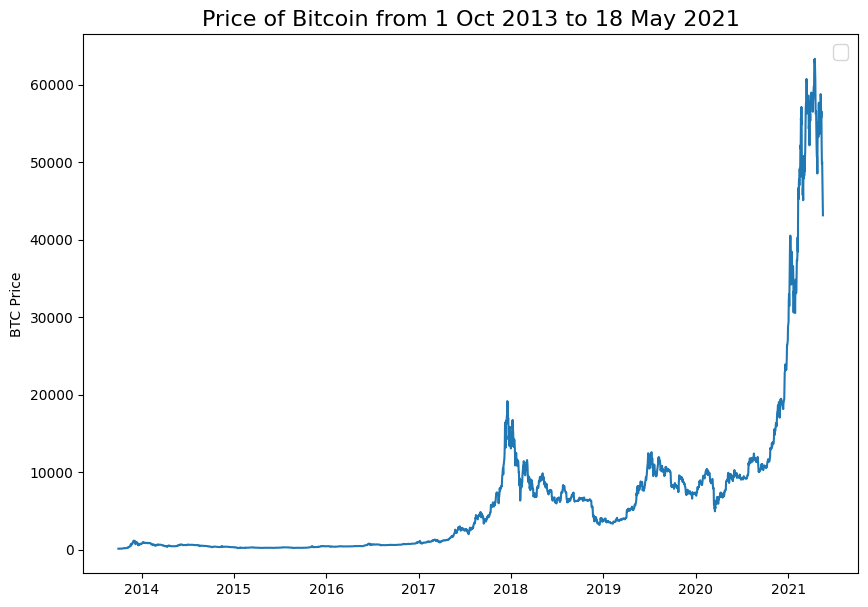

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_prices)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)
plt.show()

# Format 1 : Create Test and Train Dataset

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2229,), (558,), (2229,), (558,))

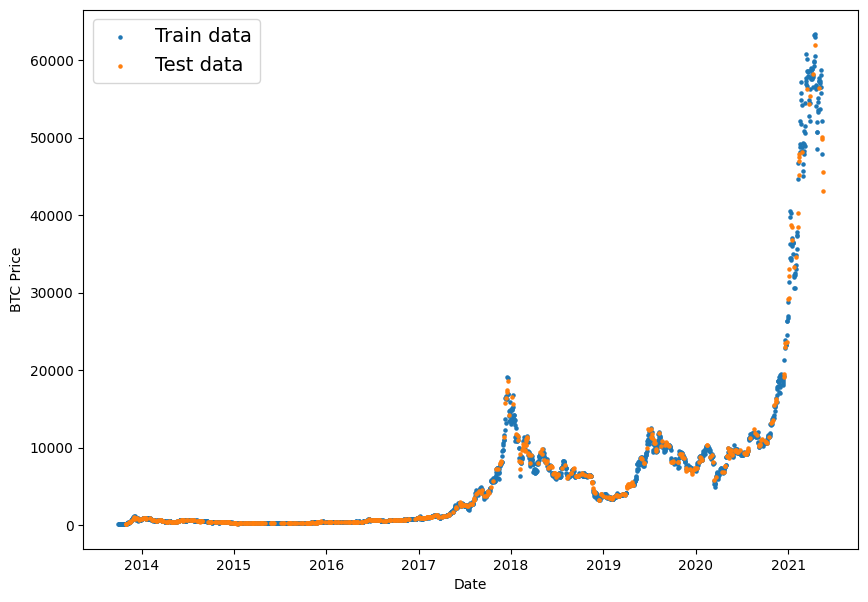

In [11]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, s=5, label="Train data")
plt.scatter(X_test, Y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

# Crreate the Time series Split Dataset

In [12]:
split_size = int(0.8 * len(prices))

# Create the train split
X_train,Y_train = timesteps[:split_size],prices[:split_size]

# Create the test split
X_test,Y_test = timesteps[split_size:],prices[split_size:]

# Shape
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2229,), (558,), (2229,), (558,))

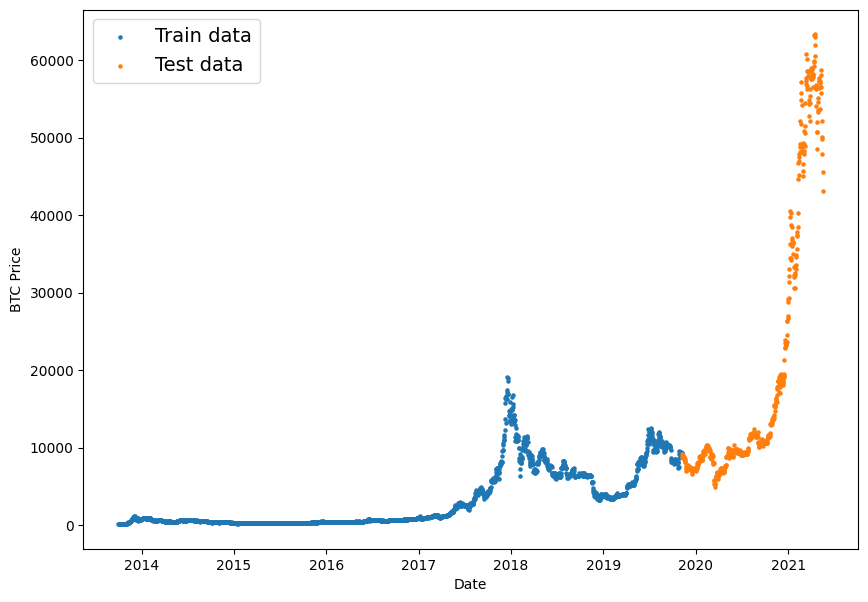

In [13]:
# Lets plot
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, s=5, label="Train data")
plt.scatter(X_test, Y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

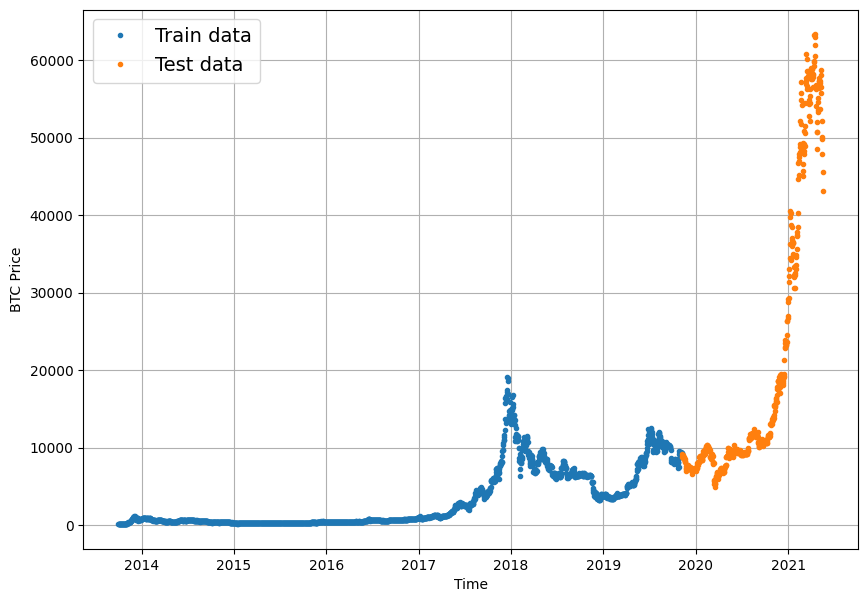

In [15]:

# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=Y_train, label="Train data")
plot_time_series(timesteps=X_test, values=Y_test, label="Test data")

# Model 0: Naive Model

In [16]:
# Create a naïve forecast
naive_forecast = Y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

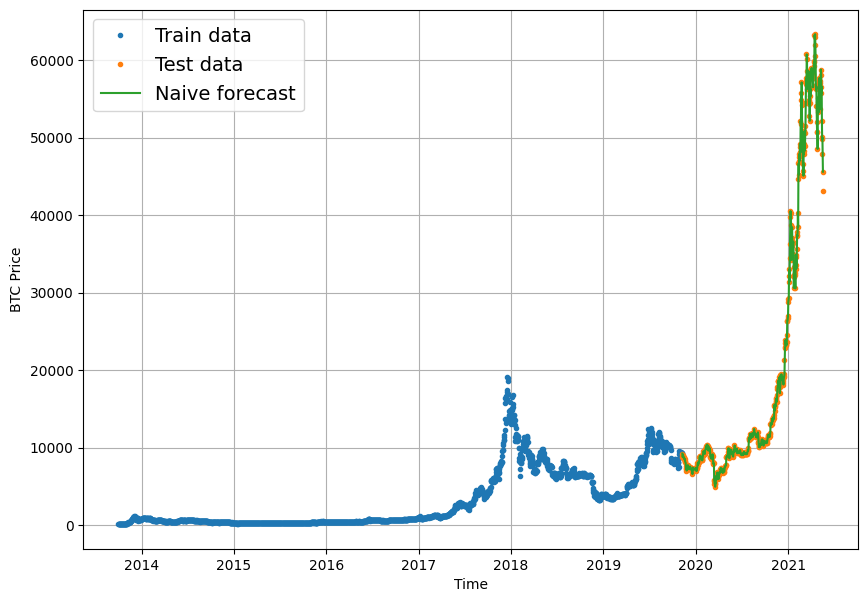

In [17]:

# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=Y_train, label="Train data")
plot_time_series(timesteps=X_test, values=Y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

# Evaluating the Model

In [18]:
import tensorflow as tf


In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # Find the mae for naive
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive


In [20]:
mean_absolute_scaled_error(y_true = Y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [21]:
from keras.backend import sqrt
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_true = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return {"mean_absolute_error":mae.numpy(),
          "mean_squared_error":mse.numpy(),
          "root_mean_squared_error":rmse.numpy(),
          "mean_absolute_percentage_error":mape.numpy(),
          "mean_absolute_squared_error":mase.numpy()}

In [22]:
naive_results = evaluate_preds(y_true = Y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mean_absolute_error': 0.0004015553569608048,
 'mean_squared_error': 3.496463344922024e-07,
 'root_mean_squared_error': 0.0005913090008550541,
 'mean_absolute_percentage_error': 2.1507666120022533e-06,
 'mean_absolute_squared_error': 0.0}

In [23]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [24]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


In [25]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size .T is transpose
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [29]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


# Turning our Window/Horizon Data in Split

In [30]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [32]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [33]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), Y_train[WINDOW_SIZE:])

True

# Create ModelCheckpoint

In [34]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model1 : Dense Model

In [35]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
# 1.Construct the model

model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = "relu"),
    layers.Dense(HORIZON, activation = "linear")

],name = "Model_1")
# 2. comipile the model
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

# fit the model
model_1.fit(x = train_windows,
            y= train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2132.2153 - mae: 2132.2153 - mse: 12968073.0000  

18/18 [==============================] - 6s 52ms/step - loss: 2005.7338 - mae: 2005.7338 - mse: 12015838.0000 - val_loss: 1455.0372 - val_mae: 1455.0372 - val_mse: 5742885.0000
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 368.2469 - mae: 368.2469 - mse: 531708.3125 - val_loss: 1744.7115 - val_mae: 1744.7115 - val_mse: 7483881.5000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 238.2126 - mae: 238.2126 - mse: 269148.8125

18/18 [==============================] - 1s 34ms/step - loss: 238.2126 - mae: 238.2126 - mse: 269148.8125 - val_loss: 1141.5807 - val_mae: 1141.5807 - val_mse: 3974291.7500
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 193.6062 - mae: 193.6062 - mse: 190304.7969

18/18 [==============================] - 1s 34ms/step - loss: 193.6062 - mae: 193.6062 - mse: 190304.7969 - val_loss: 1032.0176 - val_mae: 1032.0176 - val_mse: 3389386.2500
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 188.3304 - mae: 188.3304 - mse: 191154.9062

18/18 [==============================] - 1s 33ms/step - loss: 182.1588 - mae: 182.1588 - mse: 176294.2344 - val_loss: 1004.1386 - val_mae: 1004.1386 - val_mse: 3192036.0000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 173.6684 - mae: 173.6684 - mse: 150002.4531

18/18 [==============================] - 1s 32ms/step - loss: 175.5243 - mae: 175.5243 - mse: 161104.8750 - val_loss: 970.2878 - val_mae: 970.2878 - val_mse: 3154295.2500
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 169.7835 - mae: 169.7835 - mse: 152483.9844

18/18 [==============================] - 1s 33ms/step - loss: 168.8821 - mae: 168.8821 - mse: 150540.7969 - val_loss: 963.4119 - val_mae: 963.4119 - val_mse: 2866867.0000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 162.8501 - mae: 162.8501 - mse: 143803.8750

18/18 [==============================] - 1s 83ms/step - loss: 163.0058 - mae: 163.0058 - mse: 141671.9219 - val_loss: 887.2104 - val_mae: 887.2104 - val_mse: 2613988.5000
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 158.3681 - mae: 158.3681 - mse: 133888.7500

18/18 [==============================] - 2s 126ms/step - loss: 159.7749 - mae: 159.7749 - mse: 136660.6562 - val_loss: 873.3362 - val_mae: 873.3362 - val_mse: 2462547.0000
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 152.1506 - mae: 152.1506 - mse: 123282.9844

18/18 [==============================] - 1s 57ms/step - loss: 155.2857 - mae: 155.2857 - mse: 131546.0312 - val_loss: 846.1140 - val_mae: 846.1140 - val_mse: 2305417.2500
Epoch 11/100
12/18 [===================>..........] - ETA: 0s - loss: 156.2119 - mae: 156.2119 - mse: 134945.6250

18/18 [==============================] - 1s 86ms/step - loss: 148.0726 - mae: 148.0726 - mse: 118692.3516 - val_loss: 802.4116 - val_mae: 802.4116 - val_mse: 2095010.5000
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 141.3674 - mae: 141.3674 - mse: 110993.5234 - val_loss: 809.4916 - val_mae: 809.4916 - val_mse: 2035325.2500
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 133.2377 - mae: 133.2377 - mse: 101926.4922

18/18 [==============================] - 1s 71ms/step - loss: 140.1881 - mae: 140.1881 - mse: 109911.8672 - val_loss: 800.9020 - val_mae: 800.9020 - val_mse: 1967820.0000
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 134.1354 - mae: 134.1354 - mse: 101831.7734

18/18 [==============================] - 1s 67ms/step - loss: 135.3342 - mae: 135.3342 - mse: 101710.4297 - val_loss: 761.7296 - val_mae: 761.7296 - val_mse: 1827079.2500
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 129.3580 - mae: 129.3580 - mse: 93586.1562

18/18 [==============================] - 1s 62ms/step - loss: 134.0293 - mae: 134.0293 - mse: 98749.9531 - val_loss: 738.3707 - val_mae: 738.3707 - val_mse: 1736560.1250
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 127.2973 - mae: 127.2973 - mse: 89802.5547

18/18 [==============================] - 1s 76ms/step - loss: 129.3044 - mae: 129.3044 - mse: 93981.4375 - val_loss: 736.9062 - val_mae: 736.9062 - val_mse: 1702421.1250
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 127.6671 - mae: 127.6671 - mse: 91706.4531 - val_loss: 791.7518 - val_mae: 791.7518 - val_mse: 1839492.0000
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 130.6646 - mae: 130.6646 - mse: 94711.1719 - val_loss: 740.2430 - val_mae: 740.2430 - val_mse: 1674926.5000
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 124.2105 - mae: 124.2105 - mse: 88141.1797 - val_loss: 742.2716 - val_mae: 742.2716 - val_mse: 1668602.5000
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 126.8517 - mae: 126.8517 - mse: 89497.8125

18/18 [==============================] - 1s 63ms/step - loss: 123.1550 - mae: 123.1550 - mse: 86530.1172 - val_loss: 679.3896 - val_mae: 679.3896 - val_mse: 1501706.1250
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 121.8360 - mae: 121.8360 - mse: 85164.9922

18/18 [==============================] - 1s 64ms/step - loss: 121.8360 - mae: 121.8360 - mse: 85164.9922 - val_loss: 650.5046 - val_mae: 650.5046 - val_mse: 1449945.2500
Epoch 22/100
18/18 [==============================] - 0s 16ms/step - loss: 123.0309 - mae: 123.0309 - mse: 86498.0391 - val_loss: 669.5352 - val_mae: 669.5352 - val_mse: 1456154.2500
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 118.0008 - mae: 118.0008 - mse: 74128.0000

18/18 [==============================] - 2s 131ms/step - loss: 121.5692 - mae: 121.5692 - mse: 84321.9922 - val_loss: 646.2375 - val_mae: 646.2375 - val_mse: 1398586.8750
Epoch 24/100
18/18 [==============================] - 0s 13ms/step - loss: 117.9376 - mae: 117.9376 - mse: 81992.8828 - val_loss: 653.3547 - val_mae: 653.3547 - val_mse: 1405554.0000
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 121.4701 - mae: 121.4701 - mse: 87161.2422

18/18 [==============================] - 1s 58ms/step - loss: 117.2089 - mae: 117.2089 - mse: 81375.8125 - val_loss: 629.0597 - val_mae: 629.0597 - val_mse: 1353686.1250
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 117.3466 - mae: 117.3466 - mse: 72294.7812

18/18 [==============================] - 1s 64ms/step - loss: 117.9319 - mae: 117.9319 - mse: 80607.7812 - val_loss: 626.0898 - val_mae: 626.0898 - val_mse: 1350328.3750
Epoch 27/100
18/18 [==============================] - 0s 17ms/step - loss: 117.7704 - mae: 117.7704 - mse: 80708.0859 - val_loss: 629.4001 - val_mae: 629.4001 - val_mse: 1336334.0000
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 113.2535 - mae: 113.2535 - mse: 72252.0938

18/18 [==============================] - 1s 87ms/step - loss: 116.0373 - mae: 116.0373 - mse: 78555.5391 - val_loss: 618.2479 - val_mae: 618.2479 - val_mse: 1317541.5000
Epoch 29/100
18/18 [==============================] - 0s 16ms/step - loss: 115.1011 - mae: 115.1011 - mse: 79128.8984 - val_loss: 634.0571 - val_mae: 634.0571 - val_mse: 1340322.1250
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 114.9200 - mae: 114.9200 - mse: 77713.4453

18/18 [==============================] - 1s 57ms/step - loss: 119.1118 - mae: 119.1118 - mse: 81126.1406 - val_loss: 616.1090 - val_mae: 616.1090 - val_mse: 1296367.8750
Epoch 31/100
18/18 [==============================] - 0s 12ms/step - loss: 120.7606 - mae: 120.7606 - mse: 79795.3047 - val_loss: 680.3180 - val_mae: 680.3180 - val_mse: 1456351.1250
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 117.6761 - mae: 117.6761 - mse: 78217.9844

18/18 [==============================] - 1s 68ms/step - loss: 116.1397 - mae: 116.1397 - mse: 80206.6562 - val_loss: 607.9294 - val_mae: 607.9294 - val_mse: 1282758.0000
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 115.6933 - mae: 115.6933 - mse: 78385.2969 - val_loss: 621.7489 - val_mae: 621.7489 - val_mse: 1302311.6250
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 117.0770 - mae: 117.0770 - mse: 85216.4688 

18/18 [==============================] - 1s 59ms/step - loss: 114.8720 - mae: 114.8720 - mse: 78374.8672 - val_loss: 605.4707 - val_mae: 605.4707 - val_mse: 1265570.1250
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 113.6292 - mae: 113.6292 - mse: 77260.1016

18/18 [==============================] - 1s 68ms/step - loss: 113.6292 - mae: 113.6292 - mse: 77260.1016 - val_loss: 602.4698 - val_mae: 602.4698 - val_mse: 1267113.2500
Epoch 36/100
18/18 [==============================] - 0s 12ms/step - loss: 120.9033 - mae: 120.9033 - mse: 79290.1406 - val_loss: 603.4665 - val_mae: 603.4665 - val_mse: 1257616.7500
Epoch 37/100
18/18 [==============================] - 0s 11ms/step - loss: 118.3639 - mae: 118.3639 - mse: 80909.3281 - val_loss: 615.8262 - val_mae: 615.8262 - val_mse: 1301843.6250
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7085 - mae: 113.7085 - mse: 76080.6172 - val_loss: 604.3732 - val_mae: 604.3732 - val_mse: 1269230.5000
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6213 - mae: 115.6213 - mse: 77098.5781 - val_loss: 615.7278 - val_mae: 615.7278 - val_mse: 1298547.8750
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8685 - mae: 111.8685 -

18/18 [==============================] - 1s 65ms/step - loss: 115.4297 - mae: 115.4297 - mse: 76335.9062 - val_loss: 590.4520 - val_mae: 590.4520 - val_mse: 1226784.3750
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 109.2946 - mae: 109.2946 - mse: 71259.8516

18/18 [==============================] - 1s 47ms/step - loss: 111.0476 - mae: 111.0476 - mse: 74801.1875 - val_loss: 589.6997 - val_mae: 589.6997 - val_mse: 1218769.7500
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 110.6720 - mae: 110.6720 - mse: 73310.2109

18/18 [==============================] - 1s 33ms/step - loss: 111.0310 - mae: 111.0310 - mse: 73596.0469 - val_loss: 587.2216 - val_mae: 587.2216 - val_mse: 1215360.7500
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8282 - mae: 111.8282 - mse: 75247.7109 - val_loss: 618.0052 - val_mae: 618.0052 - val_mse: 1276835.8750
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4851 - mae: 110.4851 - mse: 73571.3203 - val_loss: 603.1736 - val_mae: 603.1736 - val_mse: 1242067.1250
Epoch 49/100
17/18 [===========================>..] - ETA: 0s - loss: 115.3743 - mae: 115.3743 - mse: 75679.2578 

18/18 [==============================] - 1s 33ms/step - loss: 115.0454 - mae: 115.0454 - mse: 75283.9375 - val_loss: 586.9480 - val_mae: 586.9480 - val_mse: 1209086.7500
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8495 - mae: 111.8495 - mse: 73651.7031 - val_loss: 614.0597 - val_mae: 614.0597 - val_mse: 1280372.8750
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8831 - mae: 110.8831 - mse: 72806.3750 - val_loss: 598.7513 - val_mae: 598.7513 - val_mse: 1229830.0000
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8482 - mae: 112.8482 - mse: 75296.9688 - val_loss: 597.8417 - val_mae: 597.8417 - val_mse: 1239635.6250
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7679 - mae: 113.7679 - mse: 75204.4297 - val_loss: 620.0262 - val_mae: 620.0262 - val_mse: 1276751.2500
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5256 - mae: 113.5256 - m

18/18 [==============================] - 1s 34ms/step - loss: 112.4701 - mae: 112.4701 - mse: 75130.4297 - val_loss: 584.1339 - val_mae: 584.1339 - val_mse: 1197886.8750
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1337 - mae: 111.1337 - mse: 72793.3516 - val_loss: 767.1768 - val_mae: 767.1768 - val_mse: 1712368.3750
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 126.7967 - mae: 126.7967 - mse: 84618.8672 - val_loss: 725.7332 - val_mae: 725.7331 - val_mse: 1576565.6250
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 118.0099 - mae: 118.0099 - mse: 75751.1328 - val_loss: 591.3411 - val_mae: 591.3411 - val_mse: 1224765.8750
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 109.8522 - mae: 109.8522 - mse: 71172.4844

18/18 [==============================] - 1s 36ms/step - loss: 110.8350 - mae: 110.8350 - mse: 72895.4141 - val_loss: 577.1234 - val_mae: 577.1234 - val_mse: 1189514.8750
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9937 - mae: 107.9937 - mse: 70778.9688 - val_loss: 584.4536 - val_mae: 584.4536 - val_mse: 1196568.0000
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 109.5859 - mae: 109.5859 - mse: 72669.3438 

18/18 [==============================] - 1s 33ms/step - loss: 108.4560 - mae: 108.4560 - mse: 71394.9766 - val_loss: 576.4632 - val_mae: 576.4632 - val_mse: 1181373.2500
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2404 - mae: 108.2404 - mse: 70785.5938 - val_loss: 580.3796 - val_mae: 580.3796 - val_mse: 1197830.2500
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7794 - mae: 110.7794 - mse: 72534.7969 - val_loss: 619.4693 - val_mae: 619.4693 - val_mse: 1271769.3750
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6921 - mae: 109.6921 - mse: 71524.7266 - val_loss: 582.0361 - val_mae: 582.0361 - val_mse: 1188771.8750
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 108.8002 - mae: 108.8002 - mse: 71516.6797 

18/18 [==============================] - 1s 33ms/step - loss: 108.8002 - mae: 108.8002 - mse: 71516.6797 - val_loss: 571.1025 - val_mae: 571.1025 - val_mse: 1172867.3750
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9413 - mae: 107.9413 - mse: 70684.7422 - val_loss: 572.7040 - val_mae: 572.7040 - val_mse: 1171655.6250
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5160 - mae: 107.5160 - mse: 70244.4219 - val_loss: 644.4852 - val_mae: 644.4852 - val_mse: 1334603.7500
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6726 - mae: 109.6726 - mse: 69259.9922 - val_loss: 593.6556 - val_mae: 593.6556 - val_mse: 1220404.5000
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 117.5304 - mae: 117.5304 - mse: 74955.2891 - val_loss: 593.7428 - val_mae: 593.7428 - val_mse: 1210323.3750
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 121.8621 - mae: 121.8621 - m

18/18 [==============================] - 1s 33ms/step - loss: 107.7433 - mae: 107.7433 - mse: 70180.4141 - val_loss: 566.7723 - val_mae: 566.7723 - val_mse: 1159687.3750
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3945 - mae: 109.3945 - mse: 70656.1875 - val_loss: 574.5466 - val_mae: 574.5466 - val_mse: 1178447.1250
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0465 - mae: 108.0465 - mse: 72055.2422 - val_loss: 603.5471 - val_mae: 603.5471 - val_mse: 1235571.2500
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4594 - mae: 108.4594 - mse: 71541.9297 - val_loss: 598.9796 - val_mae: 598.9796 - val_mse: 1218329.2500
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 106.6343 - mae: 106.6343 - mse: 69548.7031

18/18 [==============================] - 1s 32ms/step - loss: 106.6343 - mae: 106.6343 - mse: 69548.7031 - val_loss: 564.8750 - val_mae: 564.8750 - val_mse: 1155359.0000
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 116.1184 - mae: 116.1184 - mse: 76945.0859 

18/18 [==============================] - 1s 32ms/step - loss: 116.1184 - mae: 116.1184 - mse: 76945.0859 - val_loss: 564.5740 - val_mae: 564.5740 - val_mse: 1154935.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6252 - mae: 113.6252 - mse: 74205.2031 - val_loss: 654.9553 - val_mae: 654.9553 - val_mse: 1353246.8750
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3648 - mae: 112.3648 - mse: 72041.5469 - val_loss: 578.3167 - val_mae: 578.3167 - val_mse: 1184639.5000
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2020 - mae: 107.2020 - mse: 70515.7266 - val_loss: 568.3741 - val_mae: 568.3741 - val_mse: 1157455.2500
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6385 - mae: 106.6385 - mse: 68941.0625 - val_loss: 572.8374 - val_mae: 572.8374 - val_mse: 1163156.7500
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7805 - mae: 105.7805 - m

18/18 [==============================] - 1s 32ms/step - loss: 107.1078 - mae: 107.1078 - mse: 69425.2500 - val_loss: 564.3052 - val_mae: 564.3052 - val_mse: 1153761.1250
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.2628 - mae: 106.2628 - mse: 66662.1797 - val_loss: 579.6303 - val_mae: 579.6303 - val_mse: 1174293.6250
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7216 - mae: 111.7216 - mse: 72317.8438 - val_loss: 649.7462 - val_mae: 649.7462 - val_mse: 1338304.3750
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9287 - mae: 108.9287 - mse: 70325.9531 - val_loss: 573.8683 - val_mae: 573.8683 - val_mse: 1174320.7500
Epoch 93/100
18/18 [==============================] - 0s 11ms/step - loss: 114.4200 - mae: 114.4200 - mse: 73004.6875 - val_loss: 632.4144 - val_mae: 632.4144 - val_mse: 1295191.0000
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 111.5949 - mae: 111.5949 - 

18/18 [==============================] - 1s 46ms/step - loss: 105.8266 - mae: 105.8266 - mse: 67539.3047 - val_loss: 563.4229 - val_mae: 563.4229 - val_mse: 1149656.3750
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 108.1169 - mae: 108.1169 - mse: 69108.7656 - val_loss: 673.3644 - val_mae: 673.3644 - val_mse: 1400584.2500
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 111.9477 - mae: 111.9477 - mse: 73040.8125 - val_loss: 568.4300 - val_mae: 568.4300 - val_mse: 1161363.0000
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 107.6961 - mae: 107.6961 - mse: 69301.9531 - val_loss: 565.0316 - val_mae: 565.0316 - val_mse: 1151868.5000
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 102.9608 - mae: 102.9608 - mse: 60568.8750 

18/18 [==============================] - 1s 63ms/step - loss: 107.6542 - mae: 107.6542 - mse: 70439.9609 - val_loss: 562.6031 - val_mae: 562.6031 - val_mse: 1146142.2500
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4873 - mae: 116.4873 - mse: 72135.0312 - val_loss: 659.0035 - val_mae: 659.0035 - val_mse: 1349160.5000


In [37]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 659.0035 - mae: 659.0035 - mse: 1349160.7500


[659.0034790039062, 659.0034790039062, 1349160.75]

In [38]:

# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/Model_1")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 562.6030 - mae: 562.6030 - mse: 1146142.2500


[562.60302734375, 562.60302734375, 1146142.25]

# Make the Forecast Model

In [39]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [40]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8841.075, 8761.589, 9016.384, 8768.505, 8752.011, 8742.873,
        8658.432, 8522.849, 8455.648, 8516.672], dtype=float32)>)

In [41]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=test_labels, # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mean_absolute_error': 0.0,
 'mean_squared_error': 0.0,
 'root_mean_squared_error': 0.0,
 'mean_absolute_percentage_error': 0.0,
 'mean_absolute_squared_error': 0.0}

In [42]:
naive_results

{'mean_absolute_error': 0.0004015553569608048,
 'mean_squared_error': 3.496463344922024e-07,
 'root_mean_squared_error': 0.0005913090008550541,
 'mean_absolute_percentage_error': 2.1507666120022533e-06,
 'mean_absolute_squared_error': 0.0}

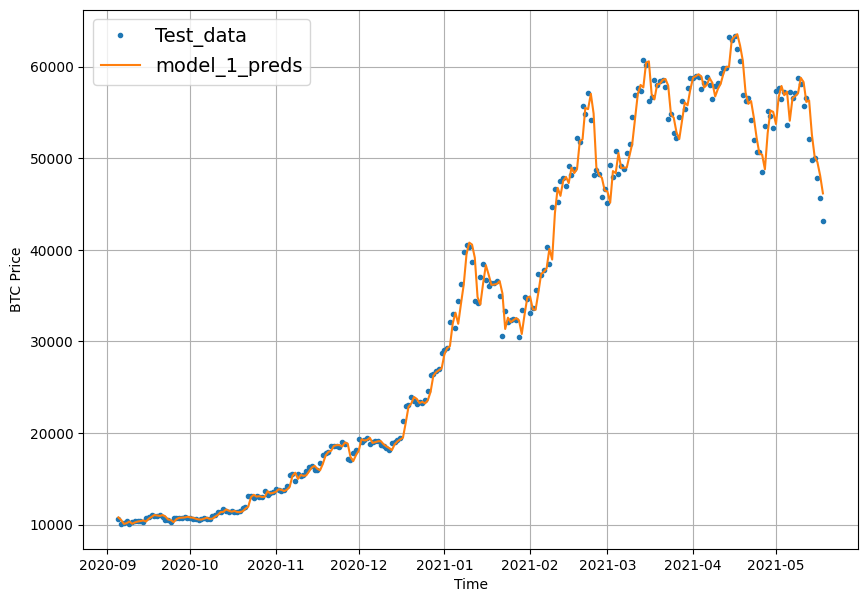

In [43]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# Model 2: Dense Model

In [44]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [45]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [46]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2205, 552, 2205, 552)

In [47]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [48]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 639.8413


639.84130859375

In [49]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 616.8983


616.8982543945312

In [50]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [51]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mean_absolute_error': 0.0,
 'mean_squared_error': 0.0,
 'root_mean_squared_error': 0.0,
 'mean_absolute_percentage_error': 0.0,
 'mean_absolute_squared_error': 0.0}

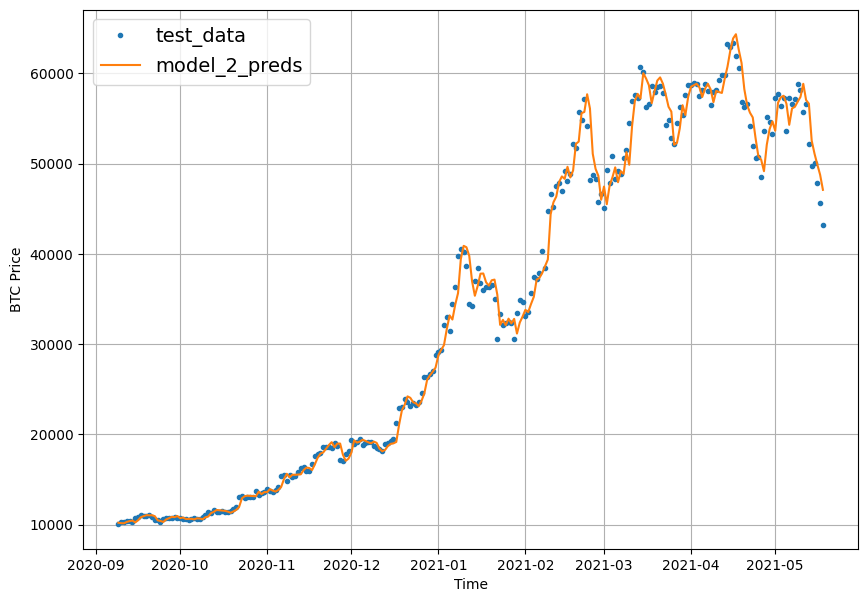

In [52]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


## Model 3 : Dense Model(horizon = 7)

In [53]:
WINDOWS = 30
HORIZON = 7

In [54]:
full_windows,full_labels =  make_windows(prices,window_size = WINDOWS, horizon = HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Create the model
tf.random.set_seed(42)

model_3  = tf.keras.Sequential([
    layers.Dense(128,activation ="relu"),
    layers.Dense(HORIZON)
],name = "Model_3")

# compile the model
model_3.compile(loss = "MAE",
                optimizer = tf.keras.optimizers.Adam())

# fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs =100,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

In [57]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1387.0364


1387.036376953125

In [58]:
# load the best version
model_3  = tf.keras.models.load_model("/content/model_experiments/Model_3")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1218.3309


1218.3309326171875

In [59]:
# make predictions
model_3_preds  = make_preds(model_3,input_data = test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9358.336 , 9447.388 , 9407.578 , 9580.472 , 9636.33  , 9464.92  ,
        9657.268 ],
       [9050.3125, 9044.971 , 8985.658 , 9362.41  , 9422.827 , 9105.286 ,
        9297.811 ],
       [8898.627 , 8964.342 , 8840.116 , 9259.03  , 9235.27  , 8998.276 ,
        9103.458 ],
       [9033.219 , 9177.643 , 9085.194 , 9310.9795, 9115.908 , 9101.241 ,
        9097.759 ],
       [8894.774 , 9173.116 , 9044.832 , 9014.768 , 8892.19  , 9083.46  ,
        8909.288 ]], dtype=float32)>

In [60]:
# evaluate the model_3 results
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mean_absolute_error': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [61]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [62]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1218.3309,
 'mse': 5210361.5,
 'rmse': 1403.021,
 'mape': 5.5984855,
 'mase': 2.1679518}

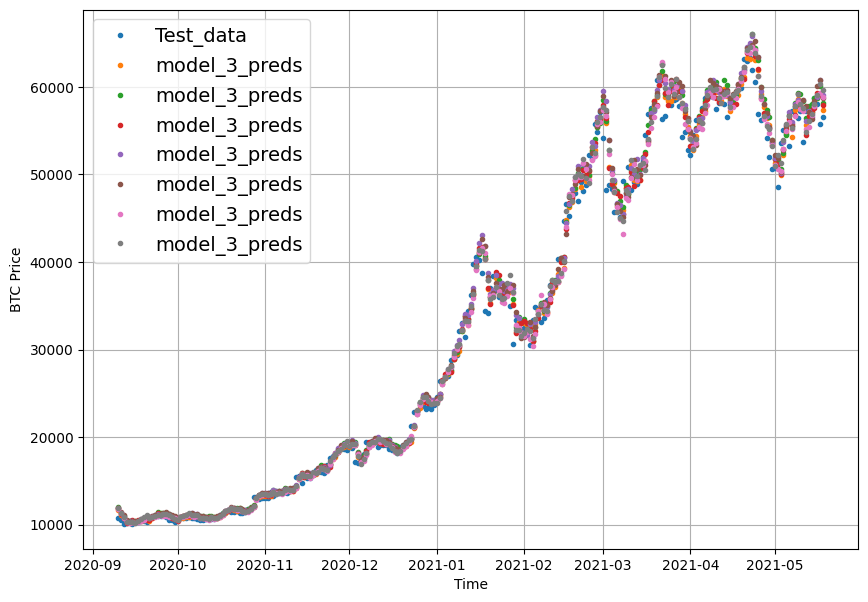

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


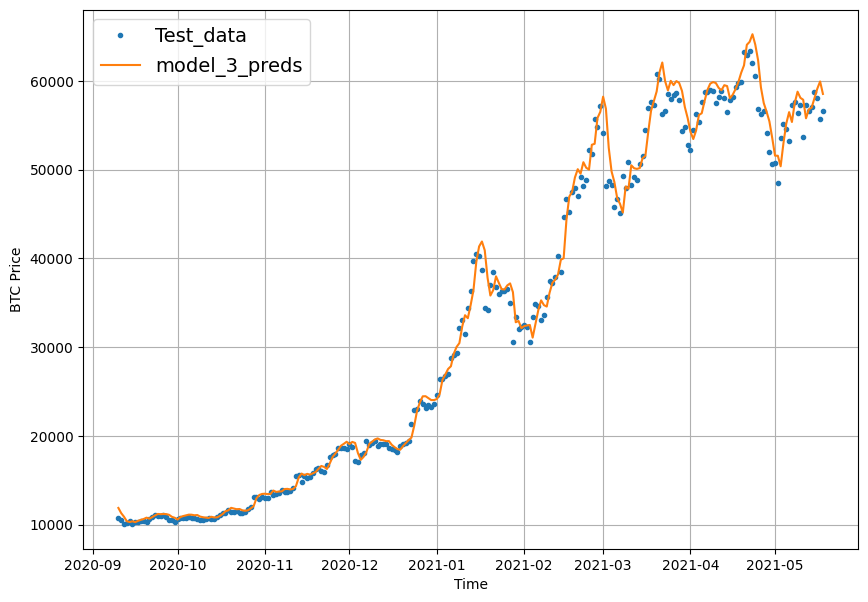

In [64]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

# Comapare the model

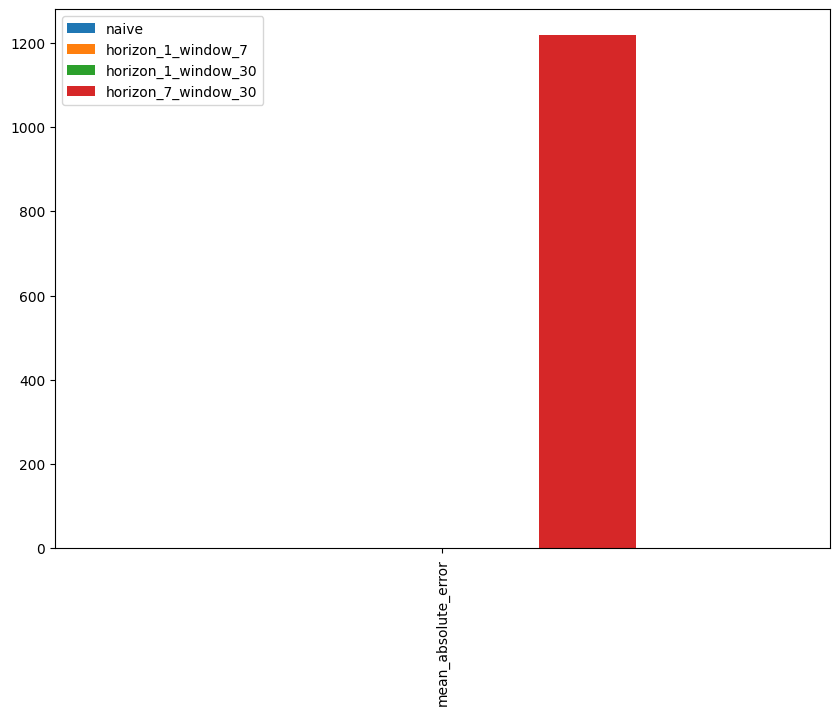

In [65]:
pd.DataFrame({"naive": naive_results["mean_absolute_error"],
              "horizon_1_window_7": model_1_results["mean_absolute_error"],
              "horizon_1_window_30": model_2_results["mean_absolute_error"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mean_absolute_error"]).plot(figsize=(10, 7), kind="bar");


## Model_4: COnv1D

In [66]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [67]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [68]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [69]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [70]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [71]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [72]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 568.5631


568.5631103515625

In [74]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8877.775, 8794.17 , 9024.949, 8783.674, 8751.5  , 8761.563,
       8675.91 , 8538.922, 8471.447, 8528.849], dtype=float32)>

In [75]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.5631,
 'mse': 1173963.8,
 'rmse': 1083.4961,
 'mape': 2.5369112,
 'mase': 0.9988079}

In [76]:
naive_results

{'mean_absolute_error': 0.0004015553569608048,
 'mean_squared_error': 3.496463344922024e-07,
 'root_mean_squared_error': 0.0005913090008550541,
 'mean_absolute_percentage_error': 2.1507666120022533e-06,
 'mean_absolute_squared_error': 0.0}

# Model 5: LSTM

In [77]:

tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [78]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 593.5181


593.51806640625

In [79]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8951.403, 8828.41 , 8964.381, 8801.35 , 8765.193, 8725.446,
       8701.308, 8577.331, 8463.78 , 8520.932], dtype=float32)>

In [80]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 593.5181,
 'mse': 1263954.9,
 'rmse': 1124.2574,
 'mape': 2.6866763,
 'mase': 1.042647}

## Make a Multivariate Time Dataset

In [81]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [82]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [83]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [84]:
  # Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


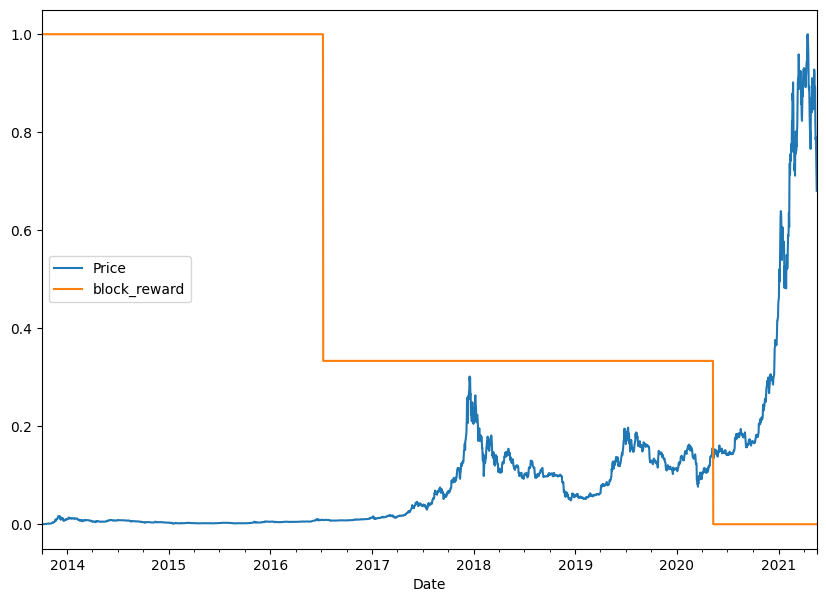

In [85]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [86]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [87]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [88]:
  # Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [89]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [90]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6 : Dense(Multivariate)

In [91]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [92]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 571.8035


571.8035278320312

In [93]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8814.765 , 8756.617 , 9034.521 , 8741.017 , 8727.158 , 8725.026 ,
       8669.501 , 8491.7705, 8440.7   , 8519.32  ], dtype=float32)>

In [94]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 571.80347,
 'mse': 1165654.6,
 'rmse': 1079.6548,
 'mape': 2.5836318,
 'mase': 1.0045003}

In [95]:
model_1_results

{'mean_absolute_error': 0.0,
 'mean_squared_error': 0.0,
 'root_mean_squared_error': 0.0,
 'mean_absolute_percentage_error': 0.0,
 'mean_absolute_squared_error': 0.0}

# N-Beats Algorithm

In [96]:

# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [100]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [102]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.3224879   0.02475429 -0.22092564  1.1738167   0.11734444  0.873304
  0.16427252]
Forecast: -0.3259899914264679


## Preparing the data with TF Data API

In [103]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [104]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [108]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, Y_train = X[:split_size], y[:split_size]
X_test, Y_test = X[split_size:], y[split_size:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(2224, 2224, 556, 556)

In [109]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(Y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(Y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up Hyperparameters

In [110]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE


(7, 8)

## Getting ready the residual connections

In [111]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Build the N-Beats

In [112]:

 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])
# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 314: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 414: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 13s, sys: 2.64 s, total: 2min 16s
Wall time: 2min 30s


In [113]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 34ms/step - loss: 577.7417 - mae: 577.7417 - mse: 1183856.1250


[577.74169921875, 577.74169921875, 1183856.125]

In [114]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 40s 40s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8860.515, 8793.953, 8992.722, 8777.61 , 8769.906, 8736.862,
       8650.257, 8506.118, 8468.718, 8490.576], dtype=float32)>

In [115]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 577.7417,
 'mse': 1183856.1,
 'rmse': 1088.0515,
 'mape': 2.6456914,
 'mase': 1.0149322}

## Plot the model

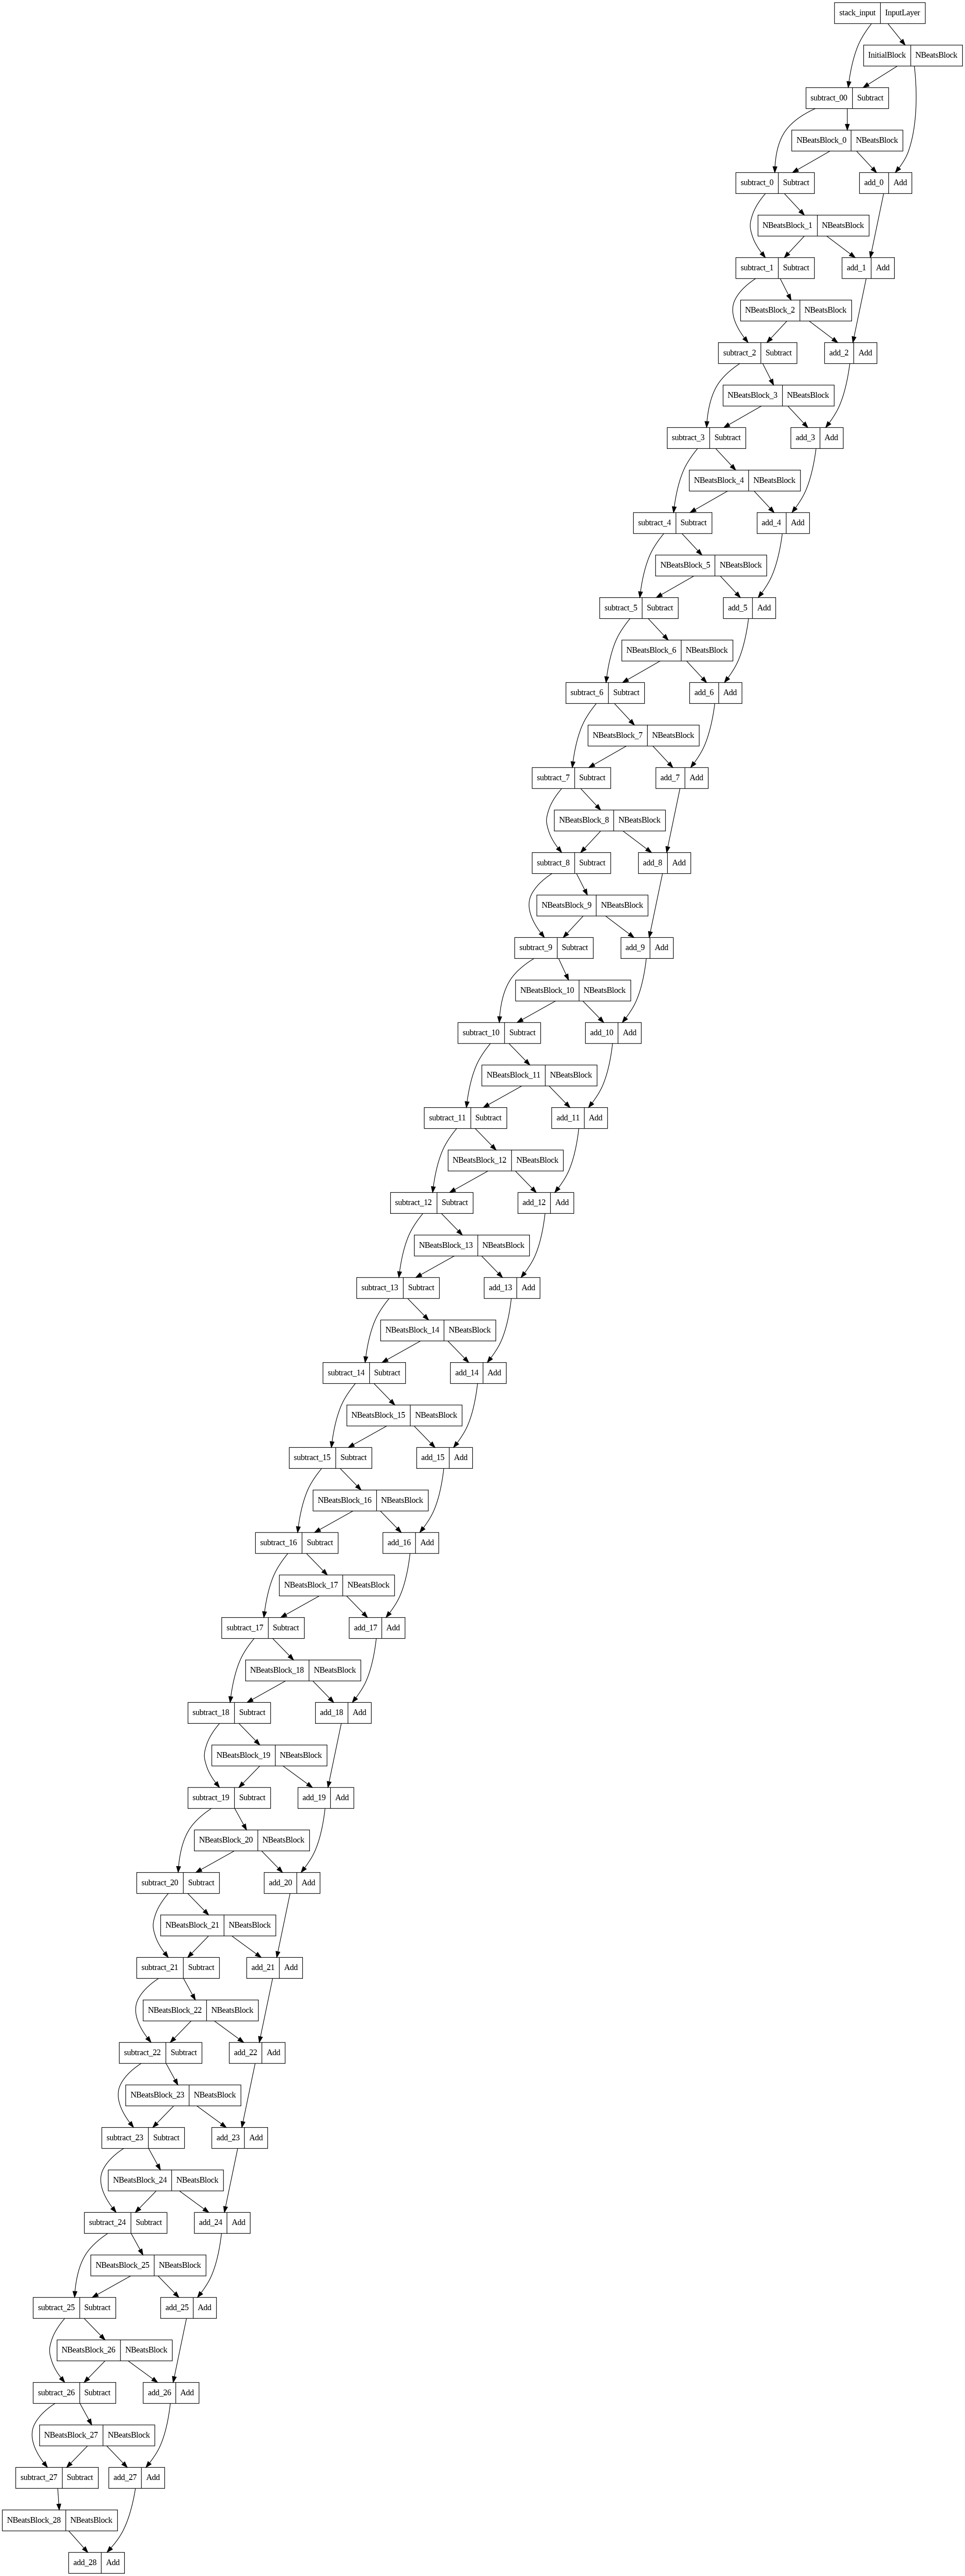

In [116]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [117]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

# Model 8: Ensemble

In [118]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [119]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 755: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 978: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 619: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 349: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 645: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 745: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 922: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 168: ReduceLROnPlateau reduci

## make a ensemble prediction model

In [120]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [121]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 81ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8815.521,  8803.661,  9111.057, ..., 50551.82 , 48368.297,
        45650.56 ],
       [ 8766.335,  8718.862,  9021.292, ..., 49789.977, 48313.46 ,
        46080.453],
       [ 8776.309,  8751.951,  9101.719, ..., 49722.973, 48864.457,
        45817.176],
       ...,
       [ 8800.401,  8840.895,  9097.108, ..., 50422.434, 47871.113,
        45848.918],
       [ 8818.871,  8785.734,  9066.422, ..., 49452.69 , 48244.78 ,
        45975.61 ],
       [ 8773.504,  8800.229,  9070.719, ..., 49906.17 , 47756.23 ,
        45788.234]], dtype=float32)>

In [122]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 564.2703,
 'mse': 1146900.8,
 'rmse': 1070.9344,
 'mape': 2.5487454,
 'mase': 0.99126667}

##Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [123]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

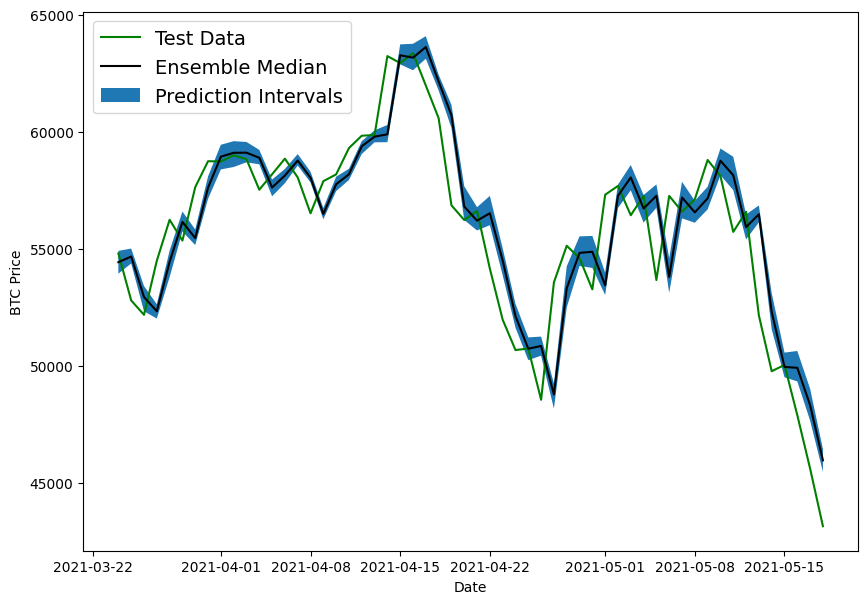

In [124]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

# Model 9:Train a model on the full historical data to make predictions into future

In [125]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [141]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [127]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [128]:

tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

## Make Prediction

In [129]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [130]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [131]:
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 60ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55946.109375

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55946.109375  ] -> Prediction: 49697.05859375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55946.109375   49697.05859375] -> Prediction: 50509.609375

1/1 [==============================] - 0s 45ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55946.109375   49697.05859375 50509.609375  ] -> Prediction: 50649.51953125

1/1 [==============================] - 0s 38ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55946.109375
 49697.05859375 50509.609375   50649.5195312

In [132]:
future_forecast[:10]

[55946.11,
 49697.06,
 50509.61,
 50649.52,
 45181.867,
 46480.95,
 48674.133,
 53342.82,
 50104.004,
 51063.64]

Plot Future

In [133]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [134]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [135]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [137]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_prices[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-18', '2021-05-19', '2021-05-20',
        '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
        '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
        '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01'],
       dtype='datetime64[D]'),
 array([43144.473, 55946.11 , 49697.06 , 50509.61 , 50649.52 , 45181.867,
        46480.95 , 48674.133, 53342.82 , 50104.004, 51063.64 , 48702.375,
        45409.64 , 48818.742, 50382.04 ], dtype=float32))

ValueError: ignored

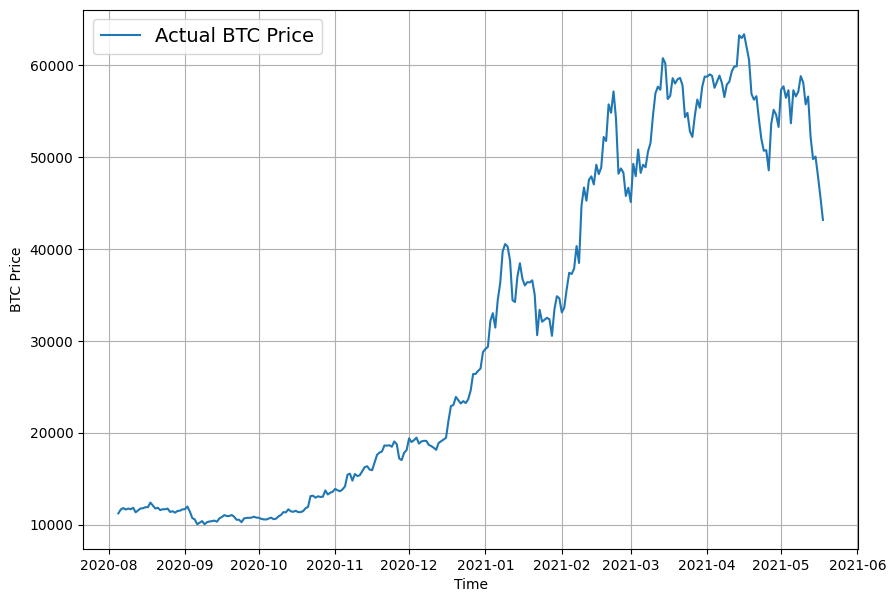

In [139]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_prices, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

# Model 10: The turkey problem

In [142]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [143]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]


[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [144]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

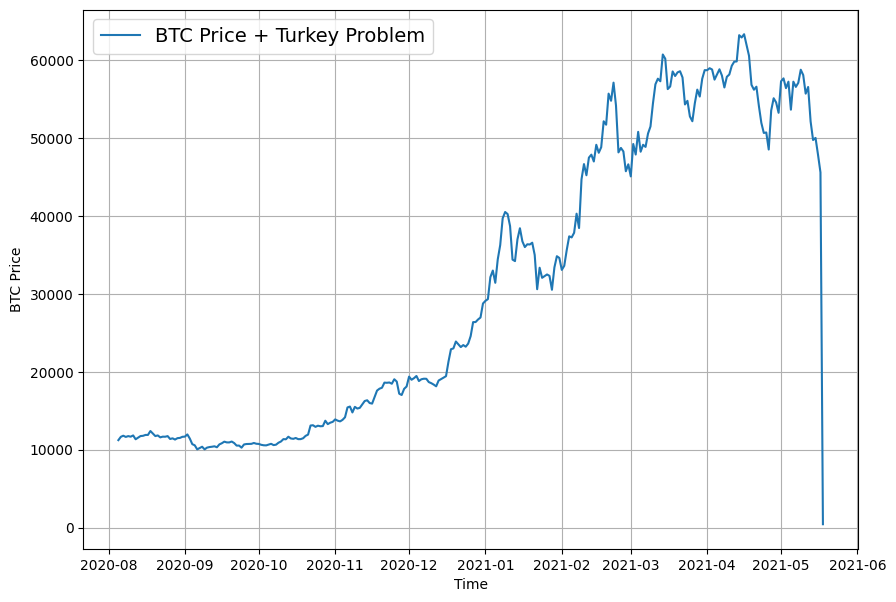

In [145]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [146]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

# Building the turkey model

In [147]:

# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [148]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 733.8494


733.849365234375

In [149]:

# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 639.9114


639.911376953125

In [150]:
  # Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8818.798, 8748.444, 9025.062, 8739.871, 8720.133, 8740.175,
       8655.409, 8495.256, 8445.039, 8513.407], dtype=float32)>

In [151]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17131.186,
 'mse': 614474500.0,
 'rmse': 23715.283,
 'mape': 121.3752,
 'mase': 26.510561}

In [152]:
model_1_results

{'mean_absolute_error': 0.0,
 'mean_squared_error': 0.0,
 'root_mean_squared_error': 0.0,
 'mean_absolute_percentage_error': 0.0,
 'mean_absolute_squared_error': 0.0}

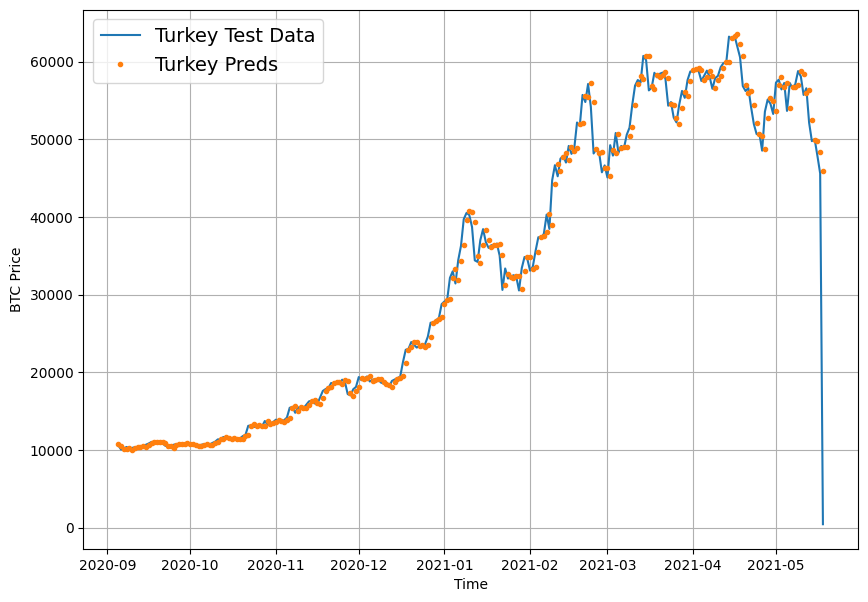

In [153]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [154]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error,mean_absolute_squared_error,mae,mse,rmse,mape,mase
naive_model,0.000402,3.496463e-07,0.000591,0.000002,0.0,NaN,NaN,NaN,NaN,NaN
model_1_dense_w7_h1,0.000000,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
model_2_dense_w30_h1,0.000000,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
model_3_dense_w30_h7,NaN,NaN,NaN,NaN,NaN,1218.330933,5.210362e+06,1403.020996,5.598485,2.167952
model_4_CONV1D,NaN,NaN,NaN,NaN,NaN,568.563110,1.173964e+06,1083.496094,2.536911,0.998808
model_5_LSTM,NaN,NaN,NaN,NaN,NaN,593.518127,1.263955e+06,1124.257446,2.686676,1.042647
model_6_multivariate,NaN,NaN,NaN,NaN,NaN,571.803467,1.165655e+06,1079.654785,2.583632,1.004500
model_8_NBEATs,NaN,NaN,NaN,NaN,NaN,577.741699,1.183856e+06,1088.051514,2.645691,1.014932
model_9_ensemble,NaN,NaN,NaN,NaN,NaN,564.270325,1.146901e+06,1070.934448,2.548745,0.991267
model_10_turkey,NaN,NaN,NaN,NaN,NaN,17131.185547,6.144745e+08,23715.283203,121.375198,26.510561


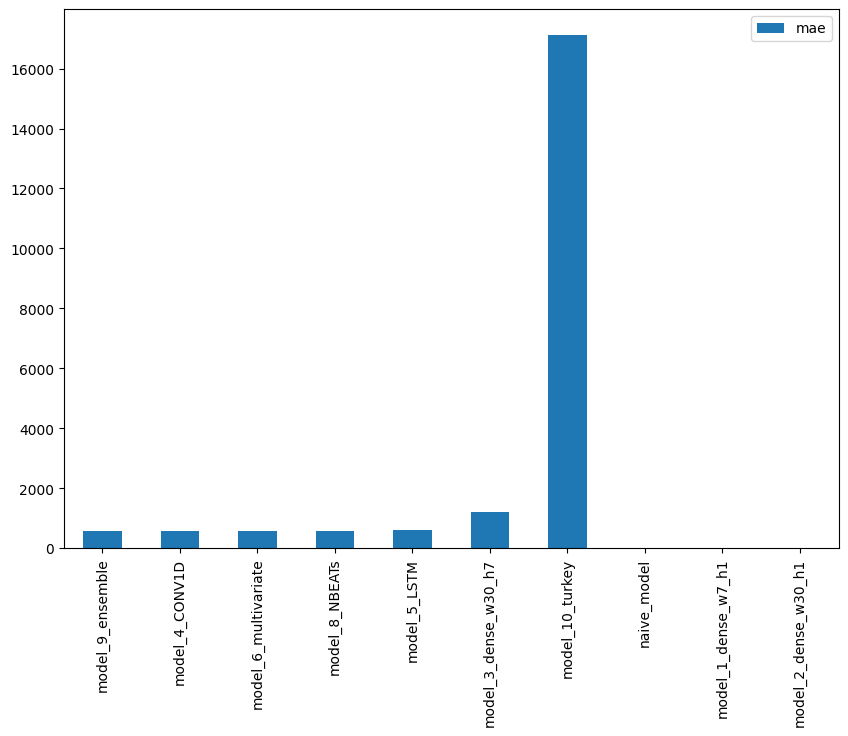

In [155]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

# YAHOO